In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import time

In [3]:
start = time.time()

## EDA

In [4]:
data = pd.read_csv('Fraud.csv')

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.shape


(6362620, 11)

In [7]:
data.isnull().values.any()

False

There are no null values.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

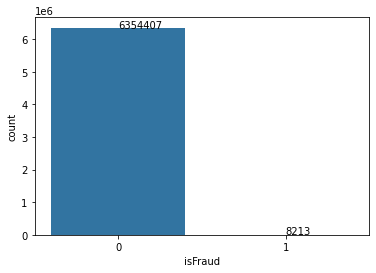

In [11]:
fig,ax = plt.subplots()
sns.countplot(x=data.isFraud,ax=ax)
for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x() + p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() #y-position
        ax.annotate(val,(x,y))

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

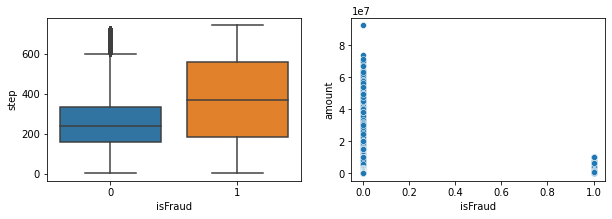

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.boxplot(x=data.isFraud,y=data.step,ax=ax[0])
sns.scatterplot(x=data.isFraud,y=data.amount,ax=ax[1])

As seen above step influences fraud detection. Therefore it might be a useful feature

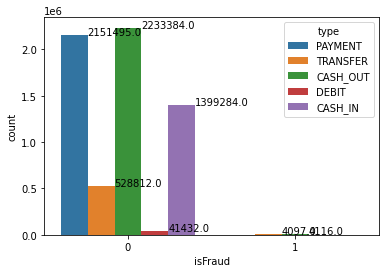

In [13]:
fig,ax = plt.subplots()
sns.countplot(x=data.isFraud,hue=data.type,ax=ax)
for p in ax.patches:
        val = p.get_height() 
        x = p.get_x() + p.get_width()  
        y = p.get_y() + p.get_height() 
        ax.annotate(val,(x,y))

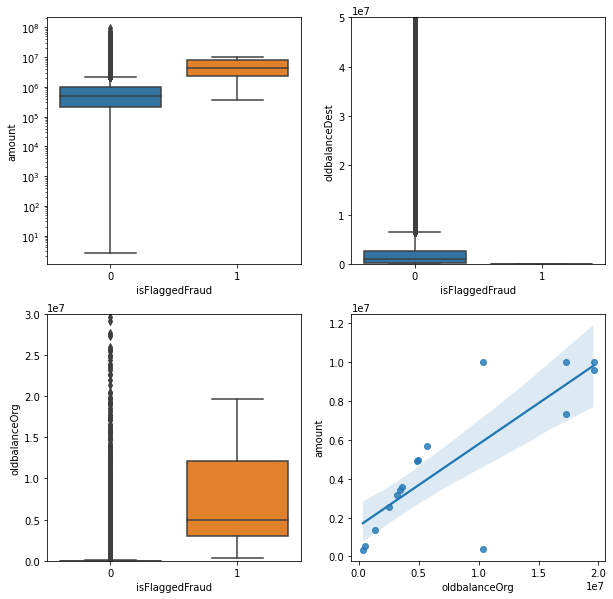

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = data.loc[(data.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()

it looks like isFlaggedFraud variable is relied on oldbalanceDest, which is 0 and some threshold on the amount variable.



<ipython-input-15-099cbea59e9f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, fontsize=13, rotation=45)
<ipython-input-15-099cbea59e9f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels, fontsize=13)


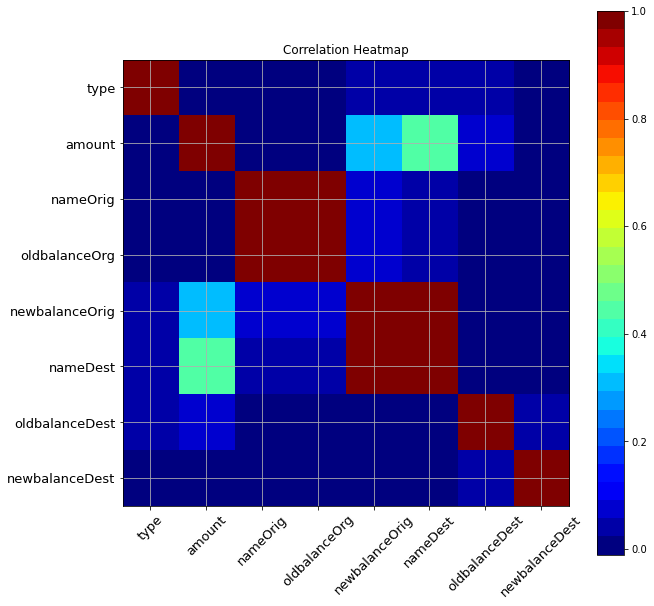

<AxesSubplot:>

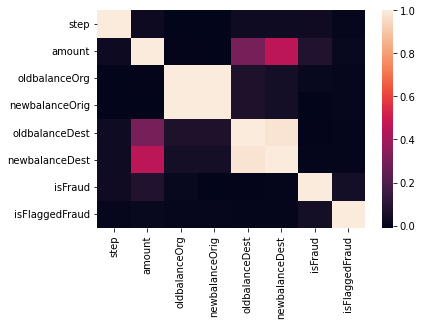

In [15]:
def correlation_plot(df):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation = "nearest", cmap = cmap)
    ax1.grid(True)
    plt.title("Correlation Heatmap")
    labels = df.columns.tolist()
    ax1.set_xticklabels(labels, fontsize=13, rotation=45)
    ax1.set_yticklabels(labels, fontsize=13)
    fig.colorbar(cax)
    plt.show()
    
correlation_plot(data)

# Alternatively, we can use quick seaborn
# plot the heatmap
sns.heatmap(data.corr())

In [16]:
print('Type of payments which are fraudulent are:',list(data.loc[(data.isFraud==1)].type.unique()))
print('No. of fraudulent transfers which are "Transfer" type are :', len(data.loc[(data.isFraud==1)&(data.type=='TRANSFER')]))
print('No. of fraudulent transfers which are "CASH_OUT" type are :', len(data.loc[(data.isFraud==1)&(data.type=='CASH_OUT')]))

Type of payments which are fraudulent are: ['TRANSFER', 'CASH_OUT']
No. of fraudulent transfers which are "Transfer" type are : 4097
No. of fraudulent transfers which are "CASH_OUT" type are : 4116


All fraud transfers are under the type 'TRANSFER' and 'CASH-OUT'.

## What determines whether the feature isFlaggedFraud gets set or not?

In [17]:
df = data
CountisFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]

CountisFlaggedFraudWithTransfer = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]

print(len(CountisFlaggedFraud))
print(len(CountisFlaggedFraudWithTransfer))
print(df.shape)
print(CountisFlaggedFraudWithTransfer)

print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))


dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\n The minimum amount transacted when isFlaggedFraud is set ={}'.format(dfFlagged.amount.min()))

print('\n The max amount transacted when isFlaggedFraud is set ={}'.format(dfFlagged.amount.max()))

print('\nThe max amount is TRANSFERED when isFlaggedFraud is NOT set ={}'.format(dfNotFlagged.amount.max()))

16
16
(6362620, 11)
         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  100

There are only 16 entries out of 6 million where the isFlaggedFraud is set. So, it do not seen to correlete with any exploratory variable.

But the isFlaggedFraud is set only whean an attempt is made to 'TRANSFER' an amount grater than 2lakhs.

In fact there are many cases in which both theres are satisfying but the Flag is NOT set.

In [18]:
data['nameOrig'].str.contains('M').any()

False

In [19]:
len(data.loc[data['nameDest'].str.contains('M') == True])

2151495

In [20]:
data.loc[data['type']=='TRANSFER'].nameDest.str.contains('M').any()


False

In [21]:
data.loc[data['type']=='CASH_OUT'].nameDest.str.contains('M').any()


False

nameOrig and nameDest can dropped as they dont impact fraud. Also there are no suspicious transfers to merchants. Therefore they can be dropped.

In [22]:
len(data.loc[(data['oldbalanceOrg']==0) & (data['newbalanceOrig']==0) & (data['amount']!=0)])

2088969

In [23]:
print(len(data.loc[(data['oldbalanceOrg']==0) & (data['newbalanceOrig']==0) & (data['amount']!=0) & (data.isFraud==1)]))
print(len(data.loc[(data['oldbalanceOrg']==0) & (data['newbalanceOrig']==0) & (data['amount']!=0) & (data.isFraud==0)]))

25
2088944


In [24]:
len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0)])

2317276

In [25]:
print(len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0) & (data.isFraud==1)]))
print(len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0) & (data.isFraud==0)]))

4070
2313206


In [26]:
len(data.loc[(data['oldbalanceDest']==0) & (data['newbalanceDest']==0) & (data['amount']!=0) & (data.isFraud==0)& (data.nameDest.str.contains('M'))])

2151495

Almost half of the transactions with 0 old and new balance of desinations are fraudulent.Therefore it is a strong indicator of fraud( Also there are no merchants in fraudulent transactions whose balance details are unknown, so this feature is strong indicator of fraud).

And the genuine transactions where balance is 0 are mostly involved by merchants. Therefore it is better to only work with 'TRANSFER' and 'CASH_OUT' transactions as no merchants are involved and they also include all fraud transactions.

In [27]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

There are only 16 entries out of 6 million where the isFlaggedFraud is set. So, it do not seen to correlete with any exploratory variable.

But the isFlaggedFraud is set only whean an attempt is made to 'TRANSFER' an amount grater than 2lakhs.

In fact there are many cases in which both theres are satisfying but the Flag is NOT set.

In [28]:
data.loc[data['isFlaggedFraud']==1].amount.describe()

count    1.600000e+01
mean     4.861598e+06
std      3.572499e+06
min      3.538742e+05
25%      2.242749e+06
50%      4.234245e+06
75%      7.883451e+06
max      1.000000e+07
Name: amount, dtype: float64

In [29]:
data.loc[data['isFlaggedFraud']==0].amount.describe()

count    6.362604e+06
mean     1.798501e+05
std      6.037884e+05
min      0.000000e+00
25%      1.338955e+04
50%      7.487127e+04
75%      2.087205e+05
max      9.244552e+07
Name: amount, dtype: float64

In description it is said 'isFlaggedFraud' will be 1 if amount of transaction is more than 200000, but the amount exceeds 200000 even when it is set to 0 as seen in above (where 75 percentile is more than 200000). Also whenever isFlaggedFraud is 1, value of isFraud is also 1. Therefore it doesn't so any correlation with other features and it can be dropped

## Data Cleaning and Feature Engineering

In [30]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [31]:
df = data.loc[(data.type=='TRANSFER')|(data.type=='CASH_OUT')]

In [32]:
train = df.copy()

In [33]:
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


As seen earlier, 0 values of oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest when amount is not 0 have a good chance of fraudulent transaction, we will create new freatures combining (oldbalanceOrg,newbalanceOrig,amount) and (oldbalanceDest,newbalanceDest,amount)

In [34]:
train['errorOrig'] = train['amount'] + train['newbalanceOrig'] - train['oldbalanceOrg']
train['errorDest'] = train['amount'] + train['oldbalanceDest'] - train['newbalanceDest']

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
train['type'] = LabelEncoder().fit_transform(train['type'])

In [37]:
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorOrig,errorDest
2,1,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,0,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


# Describe your fraud detection model in elaboration. 

# Modelling
From the model evaluation (or confusion matrix), we know that

Accuracy = (TP + TN) / Total
Presicion = TP / (TP + FP)
Recall = TP / (TP + FN)

As such, specifically for this problem, we are interested in the recall score to capture the most fraudulent transactions. As we know, due to the imbalance of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.

Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite.

Due to this, many evaluation will be based on recall score.

 I am using the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC).

F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.

We should do more focus on FP & FN.

ML algorithm selection:

1.A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded.

2.I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [39]:
y = train['isFraud']
train.drop('isFraud',axis=1,inplace=True)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.2)

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2216327, 9)
(2216327,)
(554082, 9)
(554082,)


In [42]:
x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorOrig,errorDest
182816,13,0,357354.02,0.0,0.0,814431.59,1925096.14,357354.02,-753310.53
1713928,160,0,259567.49,80110.0,0.0,0.00,259567.49,179457.49,0.00
3022884,233,0,276450.03,64953.0,0.0,1298888.57,1575338.60,211497.03,0.00
123686,11,0,119224.21,57630.0,0.0,20161.95,139386.17,61594.21,-0.01
5249046,371,0,67572.63,0.0,0.0,1183560.33,1601672.13,67572.63,-350539.17


In [43]:
random_forest = RandomForestClassifier()

In [44]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred = random_forest.predict(x_train)

In [46]:
def model_result(clf,x_test,y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1 - score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix : ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

In [47]:
model_result(random_forest,x_train,y_train)

AUPRC : 1.0
F1 - score : 1.0
Confusion_matrix : 
[[2209774       0]
 [      0    6553]]
accuracy_score
1.0
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209774
           1       1.00      1.00      1.00      6553

    accuracy                           1.00   2216327
   macro avg       1.00      1.00      1.00   2216327
weighted avg       1.00      1.00      1.00   2216327



In [48]:
model_result(random_forest,x_test,y_test)

AUPRC : 0.99639309735275
F1 - score : 0.9975859987929995
Confusion_matrix : 
[[552421      1]
 [     7   1653]]
accuracy_score
0.9999855617038633
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552422
           1       1.00      1.00      1.00      1660

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



Our default model performs good enough with recall score of 1.00 on both test and train data. By zooming in, only 5 prediction are False Negatives.

In [55]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})


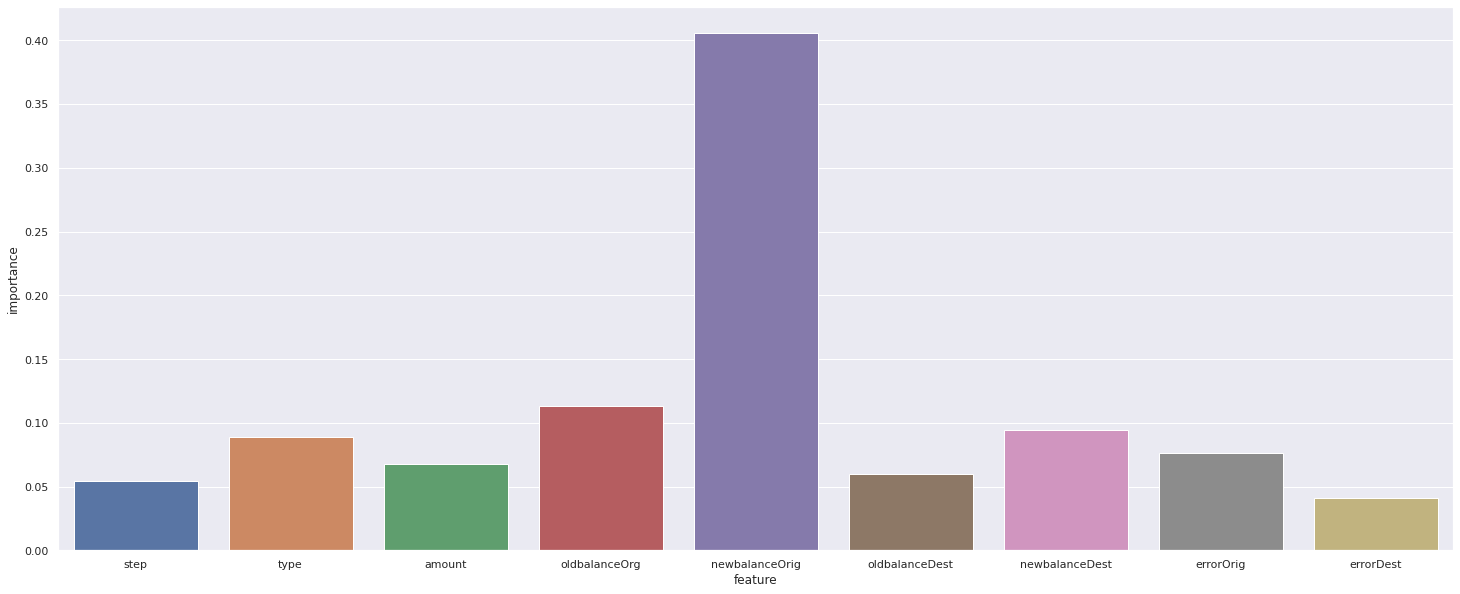

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'feature',
            y = 'importance',
            data = importances)
sns.set(rc={'figure.figsize':(25,10)})
# Show the plot
plt.show()

In [57]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
newbalanceOrig,0.406
oldbalanceOrg,0.113
newbalanceDest,0.094
type,0.089
errorOrig,0.076
amount,0.068
oldbalanceDest,0.060
step,0.054
errorDest,0.041


According to our model newbalanceOrig, oldbalanceOrg are two of the most important features maybe because all fraudulent transactions involve wiping out complete amount which would make newbalanceOrig 0. To my surprise step is second least important feature, I thought it would be more important.

conclusion
We explored the whole data using visualization techniques, added new features , removed unwanted features etc.

We also used random forest classifier because of skewness of the data, it is also robust to outliers.

In future developments, the should be taking care of 'TRANSFER' and 'CASH-OUT' type of transactions as every fraud transaction is falls under these categories. The company sholud review the accounts whose balance becomes 0 after the transactions

In [58]:
end = time.time()

print((end - start)/60 , "min")

23.59564164082209 min


In [59]:
importances.to_csv("features_importance.csv")

In [60]:
data.to_csv("fraud_new.csv")

## What kind of prevention should be adopted while company update its infrastructure?

if the company working with external vendors that provide fraud and risk signals?
1. Make sure that you are not only using the signals at the time of the decision but also storing the signals for future reference.

2. All stored data should be easily mapped back to the original customer, account, and event so that there is no confusion later as to what each attribute represents.

3. As seen above whenever fraud is detected balance becomes zero, so whenever some tries to take all money out apply a certain factor authentication, if the amount exceeds 2 lakhs as a set limit for fraud

Built a system to identify Fraudsters so the company can respond as fast as possible. catching the fraudster will not only help in the long run but also provide the company with the experience to deal with this.

Investment in Research and Development for fraud detection techniques will not help the company to be safe but make the company be prepared for any breach or fraud.

There are many ai/ml based fraud detection companies, collaboration with them will help the company while the company upgrade its infrastructure

moreover monitoring the employees can also help since they are the ones that know most about the company and they are the ones that know most of the loopholes

## Assuming these actions have been implemented, how would you determine if they work?

We will be collecting data whenever the balance becomes zero by contacting customers if the transaction was fraud or not? The analysis of that data can tell if the precautions work or not.

As for to identify fraudsters if the techniques that are used to do fraud are being used again and again we might need to change the system or process of R&D.

checking the signals for fraud detection and analysing it can tell the if change in signals is needed or we need more of that